In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('detaset.csv')
df

,x,y
0,0.00,-1.179169
1,0.01,0.515011
2,0.02,-0.047497
3,0.03,0.160731
4,0.04,0.704209
...,...,...
996,9.96,21.899947
997,9.97,21.150909
998,9.98,19.900154
999,9.99,22.883209


Text(0.5, 1.0, 'x v/s y')

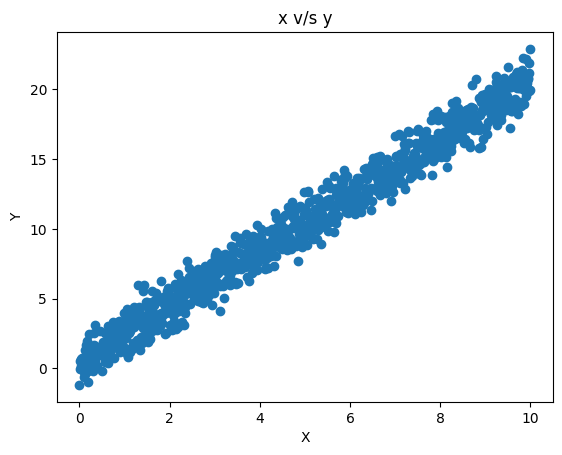

In [6]:
plt.scatter(df['x'],df['y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('x v/s y')

In [9]:
X=df['x'].values.reshape(-1,1)
Y=df['y'].values.reshape(-1,1)
X

array([[ 0.  ],
       [ 0.01],
       [ 0.02],
       ...,
       [ 9.98],
       [ 9.99],
       [10.  ]])

In [11]:
train_x = X[:800]
train_y = Y[:800]

test_x = X[800:]
test_y = Y[800:]

In [14]:
def linear_regression(X, Y, learning_rate=0.01, iterations=1000):

    n = X.shape[0]
    
    
    w = 0
    b = 0
    
    
    for i in range(iterations):
        
        y_pred = w * X + b
        
        
        loss = (1/n) * np.sum((y_pred - Y)**2)
        
        
        dw = (2/n) * np.sum(X * (y_pred - Y))  
        db = (2/n) * np.sum(y_pred - Y)        
        
        
        w -= learning_rate * dw
        b -= learning_rate * db
        
    
        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss}")
    
    return w,b

In [15]:
w,b=linear_regression(train_x,train_y)
print(f" weights={w}, b= {b}")

Iteration 0: Loss = 93.31792437239841
Iteration 100: Loss = 0.9198870349488542
Iteration 200: Loss = 0.9178382408820008
Iteration 300: Loss = 0.9170614057595426
Iteration 400: Loss = 0.9167668555081298
Iteration 500: Loss = 0.9166551717697161
Iteration 600: Loss = 0.9166128249804457
Iteration 700: Loss = 0.916596768474933
Iteration 800: Loss = 0.916590680377731
Iteration 900: Loss = 0.9165883719721123
 weights=1.9759311190290072, b= 0.5665500006427757


In [16]:
def myfunc(test_x):
  return w * test_x + b

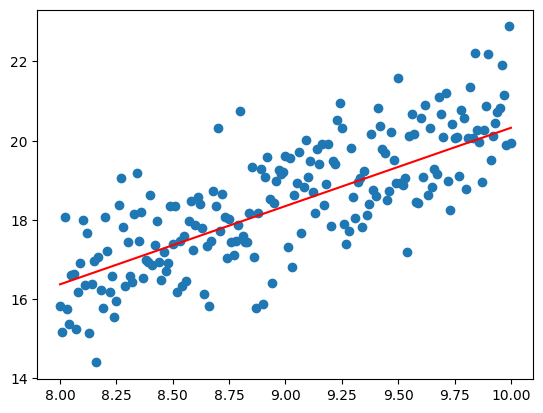

In [24]:
mymodel = list(map(myfunc, test_x))
plt.scatter(test_x, test_y)
plt.plot(test_x, mymodel,color='red', label = 'predicted')
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_x,train_y)

LinearRegression()

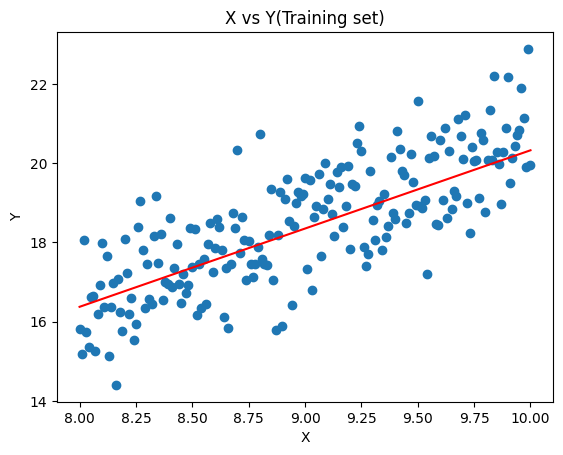

In [27]:
plt.scatter(test_x, test_y)
plt.plot(test_x,regressor.predict(test_x),color='red')
plt.title('X vs Y(Training set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()